<a href="https://colab.research.google.com/github/perezfr/learning-events/blob/master/learning_Events_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
plotly.__version__

'3.4.1'

In [2]:
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline

In [0]:
!pip install -U -q PyDrive
!pip install plotly --upgrade
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

#mount google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#classEvents.pkl was created prior from csv files 178MB
df = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/7214/classEvents.pkl')

In [0]:
#Users that participated every week of the course
usersFullParticipation = pd.Series(df[df['timecreated']>'08-2016'].set_index('timecreated').groupby([pd.Grouper(
    freq='W'),'username'])['eventname'].count().to_frame().unstack(
).dropna(axis=1).columns.get_level_values(1).values)

#count the activities for users listed
dfUserActivities = df[df['username'].isin(usersFullParticipation)]['username'].value_counts().to_frame()

#average events for the time
df2= df[df['username'].isin(usersFullParticipation)].set_index(
    'timecreated').groupby(pd.Grouper(freq='W'))['username'].count().to_frame()/1375

#Users at the quartiles
usersAtQuartiles = ['user8735150468524670977','user744859621046353921','user1235479718157877249']

In [13]:
print('Number of students:',len(usersFullParticipation))
print('75th quantile:',dfUserActivities.quantile(.75).values[0])
print('50th quantile:',dfUserActivities.quantile(.5).values[0])
print('25th quantile:',dfUserActivities.quantile(.25).values[0])

Number of students: 1375
75th quantile: 739.0
50th quantile: 304.0
25th quantile: 87.5


In [0]:
#plot group mean events by time dashed line
df2.plot(linewidth=4.0,figsize=(10,10),legend=False,color='gray',linestyle='--')
for i in usersAtQuartiles:
  df[df['username']==i].set_index('timecreated').groupby(pd.Grouper(
      freq='W'))['username'].count().plot() #plot quartile users

In [0]:
#df = pd.read_csv('data/mdl_logstore_standard_log.csv')
cols = ['username','eventname','component', 'action', 'target','objecttable', 'objectid',
       'edulevel','contextlevel','courseid','other','timecreated']
topActions = ['viewed','sent','created','uploaded','called','updated','deleted']
#df['timecreated'] = pd.to_datetime(df['timecreated'],unit='s')
#df = df[(df['timecreated']>'2016-07-27')&(df['timecreated']<'2016-09-10')]
df = df[cols]
#df = df[df['username']=='user7619359643386511361']

In [0]:
#actions we are focusing on per the model
allActions = df[(df['action'].isin(['viewed','sent','called','created','updated','added']))].groupby([pd.Grouper(
    key='timecreated', freq='12H'),'action'])['action']\
    .count().to_frame().unstack()#.plot(figsize=(10,10))
allActions = allActions['action']
#to percentages
allActionsPct = allActions.divide(allActions.sum(axis=1), axis=0)#.plot.area(figsize=(10,10))
#allActions.to_pickle('data/allActions_2016-07-27thru2016-09-10.pkl')

In [36]:
df['edulevel'].astype('category').memory_usage()

11931188

In [0]:
dfUserActivities[dfUserActivities['username']==302]

,username
user2090509038507786241,302
user7449226217741352961,302
user2362562136871272449,302


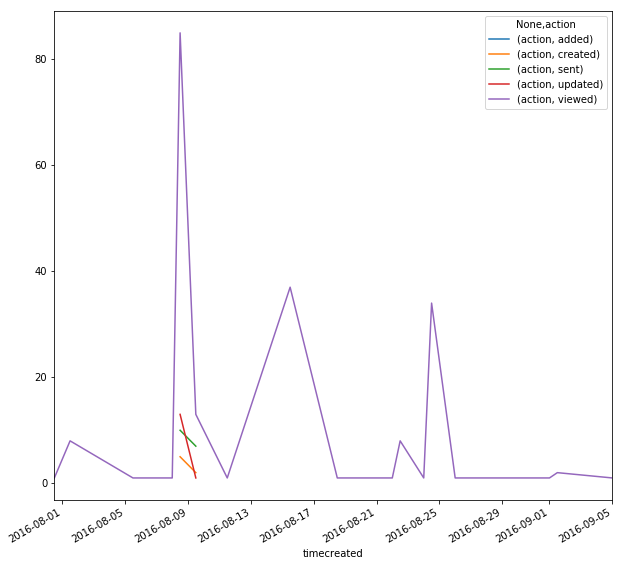

In [24]:
df[(df['action'].isin(['viewed','sent','called','created','updated','added']))&(
    df['username']=='user3189706223138111489')].groupby([pd.Grouper(
    key='timecreated', freq='12H'),'action'])['action']\
.count().to_frame().unstack().plot(figsize=(10,10))

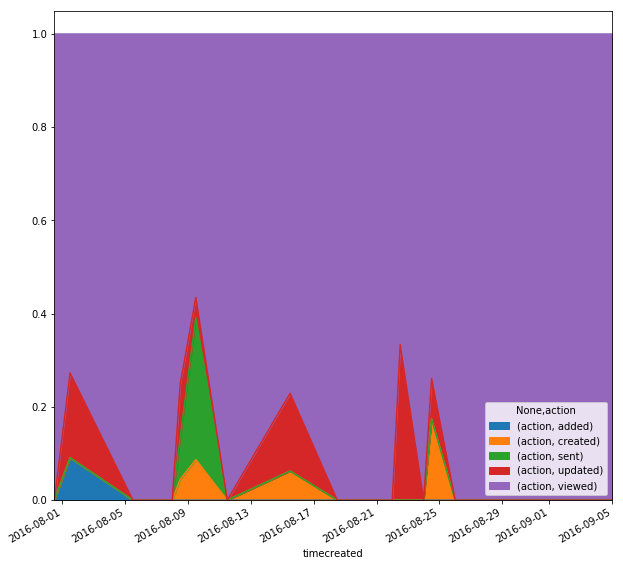

In [25]:
medaction = df[(df['action'].isin(['viewed','sent','called','created','updated','added']))&(
    df['username']=='user3189706223138111489')].groupby([pd.Grouper(
    key='timecreated', freq='12H'),'action'])['action']\
.count().to_frame().unstack()#.plot(figsize=(10,10))

medaction.divide(medaction.sum(axis=1), axis=0).plot.area(figsize=(10,10))

In [29]:
df[df['eventname'].str.contains('blog')]['eventname'].value_counts()

\core\event\blog_entries_viewed         2379
\core\event\blog_entry_updated           331
\core\event\blog_entry_created           252
\core\event\blog_association_created     135
\core\event\blog_comment_created          66
\core\event\blog_entry_deleted            10
\core\event\blog_comment_deleted           1
Name: eventname, dtype: int64

In [0]:
list(df['eventname'].value_counts().keys())

In [0]:
df[(df['action'].isin(['viewed','sent','called','created','updated','added']))&(df['username']=='user7619359643386511361')].groupby([pd.Grouper(
    key='timecreated', freq='12H'),'action'])['action']\
    .count().to_frame().unstack().plot()

In [0]:
allActions.plot()

In [0]:
#get action for top 50 users
top50users = df[(df['timecreated']>'2016-07-27')&(df[
    'timecreated']<'2016-09-10')]['username'].value_counts()[
    :50]#.plot.bar()
#top50users.to_pickle('data/top50users.pkl')

actionByTop50Users = {}
for u in top50users.keys():
    actionByTop50Users[u] = df[(df['username']==u)&(df['action'].isin(['viewed','sent','called','created','updated','added']))\
                       &(df['timecreated']>'2016-07-27')&(df['timecreated']<'2016-09-10')].groupby([pd.Grouper(key='timecreated',\
                       freq='12H'),'action'])['action'].count().to_frame().unstack()
    actionByTop50Users[u] = actionByTop50Users[u].divide(actionByTop50Users[u].sum(axis=1), axis=0)
    #.plot.area(figsize=(10,10),title=u)

#pd.to_pickle(actionByTop50Users, 'data/actionByTop50Users_2016-07-27thru2016-09-10.pkl')

In [0]:
dfA = pd.read_pickle('data/actionByTop50Users_2016-07-27thru2016-09-10.pkl')
top50users = pd.read_pickle('data/top50users.pkl')

In [0]:
#Prints an area graph of percentage, 
#meaning when one value goes up another goes down.
c = 0
for k,v in df.items():
    if c == 10:
        break
    df[k].plot.area(figsize=(10,10),title=k)
    c += 1

In [0]:
#Use this as an example
for i in range(79):
    data = [go.Scatterpolar(
      r = dfA['user7619359643386511361']['action'].iloc[i].values,
      theta = dfA['user7619359643386511361']['action'].iloc[i].keys(),
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, .6]
        )
      ),
      showlegend = False,
        title=str(dfA['user7619359643386511361']['action'].iloc[i].name)
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [0]:
df[(df['timecreated']>'2016-07-27')&(df['timecreated']<'2016-09-10')&(
    df['action']=='uploaded')]['other'].iloc[6001]

In [0]:
dfA['user7619359643386511361'].plot.area(figsize=(10,10))

In [0]:
df[(df['username']=='user3189706223138111489')&(df['action'].isin(topActions))].set_index(
    'timecreated').groupby([pd.Grouper(freq="D"),'action'])['action'].count()\
    .to_frame().unstack().plot()

In [0]:
df[(df['username']=='user7619359643386511361')&(df['action'].isin(topActions))].set_index(
    'timecreated').groupby([pd.Grouper(freq="2D"),'action'])['action'].count()\
.to_frame().unstack().plot()

In [0]:
df[(df['username']=='user7619359643386511361')&(df['action'].isin(topActions))].set_index(
    'timecreated').groupby([pd.Grouper(freq="12H"),'action'])['action'].count()\
.to_frame().unstack().plot()

In [0]:
actionByTopUser = df[(df['username']=='user7619359643386511361')&(df['action'].isin(
    topActions))&(df['timecreated']>'2016-07-27')&(df['timecreated']<'2016-09-10')].groupby(
    [pd.Grouper(key='timecreated',freq='12H'),'action'])['action'].count().to_frame().unstack()
actionByTopUser = actionByTopUser[u].divide(actionByTopUser.sum(axis=1), axis=0)

In [0]:
actionByTopUser2D = df[(df['username']=='user7619359643386511361')&(df['action'].isin(
    topActions))].groupby([pd.Grouper(key='timecreated',freq='2D'),'action'])[
    'action'].count().to_frame().unstack()
actionByTopUser2D = actionByTopUser2D.divide(actionByTopUser2D.sum(axis=1), axis=0)

In [0]:
actionByTopUser2Di = df[df['action'].isin(topActions)].groupby([pd.Grouper(
    key='timecreated',freq='2D'),'action'])['action'].count().to_frame().unstack()
#actionByTopUser2D = actionByTopUser2D.divide(actionByTopUser2D.sum(axis=1), axis=0)

In [0]:
actionByTopUser3Di = df[(df['username']=='user3189706223138111489')&(df['action'].isin(
    topActions))].groupby([pd.Grouper(key='timecreated',freq='3D'),'action'])[
    'action'].count().to_frame().unstack()
#actionByTopUser2D = actionByTopUser2D.divide(actionByTopUser2D.sum(axis=1), axis=0)

In [0]:
actionByTopUser.plot.area()

In [0]:
actionByTopUser1D.plot.area()

In [0]:
#actionByTopUser2D = actionByTopUser2Di.divide(actionByTopUser2Di.sum(axis=1), axis=0)
actionByTopUser2D.plot.area(figsize=(10,10))

In [0]:
actionByTopUser2Di.plot(figsize=(10,10))

In [0]:
actionByTopUser2Di.plot.area(figsize=(10,10))

In [0]:
actionByTopUser3Di.plot()

In [0]:
#Use this as an example
for i in range(77):
    data = [go.Scatterpolar(
      r = actionByTopUser['action'].iloc[i].values,
      theta = actionByTopUser['action'].iloc[i].keys(),
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, .5]
        )
      ),
      showlegend = False,
        title=str(actionByTopUser['action'].iloc[i].name)
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [0]:
#Use this as an example
for i in range(40):
    data = [go.Scatterpolar(
      r = actionByTopUser1D['action'].iloc[i].values,
      theta = actionByTopUser1D['action'].iloc[i].keys(),
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, .5]
        )
      ),
      showlegend = False,
        title=str(actionByTopUser1D['action'].iloc[i].name)
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [0]:
#Use this as an example
for i in range(20):
    data = [go.Scatterpolar(
      r = actionByTopUser2D['action'].iloc[i].values,
      theta = actionByTopUser2D['action'].iloc[i].keys(),
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, .3]
        )
      ),
      showlegend = False,
        title=str(actionByTopUser2D['action'].iloc[i].name)
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [0]:
#Use this as an example
for i in range(20):
    data = [go.Scatterpolar(
      r = actionByTopUser2Di['action'].iloc[i].values,
      theta = actionByTopUser2Di['action'].iloc[i].keys(),
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 500]
        )
      ),
      showlegend = False,
        title=str(actionByTopUser2Di['action'].iloc[i].name)
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [0]:
actionByTopUser3Di['action'].iloc[2]#.keys()

In [0]:
enable_plotly_in_cell()
data = [go.Scatterpolar(
      r = actionByTopUser3Di['action'].iloc[2].values,
      theta = actionByTopUser3Di['action'].iloc[2].keys(),
      fill = 'toself'
    )]

layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 30]
        )
      ),
      showlegend = False,
      title=str(actionByTopUser3Di['action'].iloc[2].name)
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [0]:
#Use this as an example
enable_plotly_in_cell()
for i in range(12):
    data = [go.Scatterpolar(
      r = actionByTopUser3Di['action'].iloc[i].values,
      theta = actionByTopUser3Di['action'].iloc[i].keys(),
      fill = 'toself'
    )]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 20]
        )
      ),
      showlegend = False,
        title=str(actionByTopUser3Di['action'].iloc[i].name)
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [0]:
df['component'].value_counts()

In [0]:
mikeEvents = df.groupby(['component','eventname'])['username'].count().to_frame(name='eventcount')

In [0]:
mikeEvents.loc['core'].sort_values(by='eventcount',ascending=False)

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)